In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pwd

'/content/drive/My Drive/Colab Notebooks/DSCT/Machine Learning/Fruits Classification'

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/DSCT/Machine Learning/Fruits Classification

/content/drive/MyDrive/Colab Notebooks/DSCT/Machine Learning/Fruits Classification


In [ ]:
%pwd

'/content/drive/MyDrive/Colab Notebooks/DSCT/Machine Learning/Fruits Classification'

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import cv2 
import os 
import random
from matplotlib import pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/Dataset/Fruit Classification/train'
classes = os.listdir(train_dir)
len(classes)

28

In [ ]:
X  = []
y = []

In [ ]:
for class_name in classes : 
    class_samples = os.listdir(f'{train_dir}/{class_name}')
    for sample in class_samples:
      X.append(cv2.resize(cv2.cvtColor(cv2.imread(f'{train_dir}/{class_name}/{sample}'), cv2.COLOR_BGR2GRAY), (50, 50)))
      y.append(class_name)

In [ ]:
X = np.asarray(X)
y= np.asarray(y)

In [ ]:
print(X.shape , y.shape)

(14076, 50, 50) (14076,)


In [ ]:
class_counts = Counter(y)
print(class_counts)

Counter({'Grape Blue': 984, 'Pear': 696, 'Apple Braeburn': 492, 'Apple Granny Smith': 492, 'Apricot': 492, 'Cantaloupe': 492, 'Cherry': 492, 'Papaya': 492, 'Peach': 492, 'Pomegranate': 492, 'Strawberry': 492, 'Banana': 490, 'Cactus fruit': 490, 'Clementine': 490, 'Limes': 490, 'Mango': 490, 'Passion Fruit': 490, 'Pineapple': 490, 'Raspberry': 490, 'Orange': 479, 'Watermelon': 475, 'Kiwi': 466, 'Blueberry': 462, 'Corn': 450, 'Potato Red': 450, 'Plum': 447, 'Avocado': 427, 'Cucumber Ripe': 392})


In [ ]:
X1 = X.reshape(X.shape[0] , -1)
X1.shape

(14076, 2500)

In [ ]:
df=[]

In [ ]:
df = pd.DataFrame(X1)
df['name'] = y.tolist()

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,name
0,255,255,255,255,254,254,254,255,253,253,...,255,255,255,255,255,255,255,255,255,Apple Braeburn
1,254,254,254,254,254,253,254,254,254,254,...,255,255,255,255,255,255,255,255,255,Apple Braeburn
2,255,255,255,255,255,255,255,255,254,254,...,255,255,255,255,255,255,255,255,255,Apple Braeburn
3,254,254,255,254,254,254,253,255,254,254,...,255,255,255,255,255,255,255,255,255,Apple Braeburn
4,255,255,255,255,255,255,255,255,253,254,...,255,255,255,255,255,255,255,255,255,Apple Braeburn


#EDA

In [ ]:
df.value_counts('name')

name
Grape Blue            984
Pear                  696
Apple Braeburn        492
Apricot               492
Strawberry            492
Pomegranate           492
Cantaloupe            492
Cherry                492
Peach                 492
Papaya                492
Apple Granny Smith    492
Mango                 490
Raspberry             490
Pineapple             490
Passion Fruit         490
Limes                 490
Clementine            490
Cactus fruit          490
Banana                490
Orange                479
Watermelon            475
Kiwi                  466
Blueberry             462
Corn                  450
Potato Red            450
Plum                  447
Avocado               427
Cucumber Ripe         392
dtype: int64

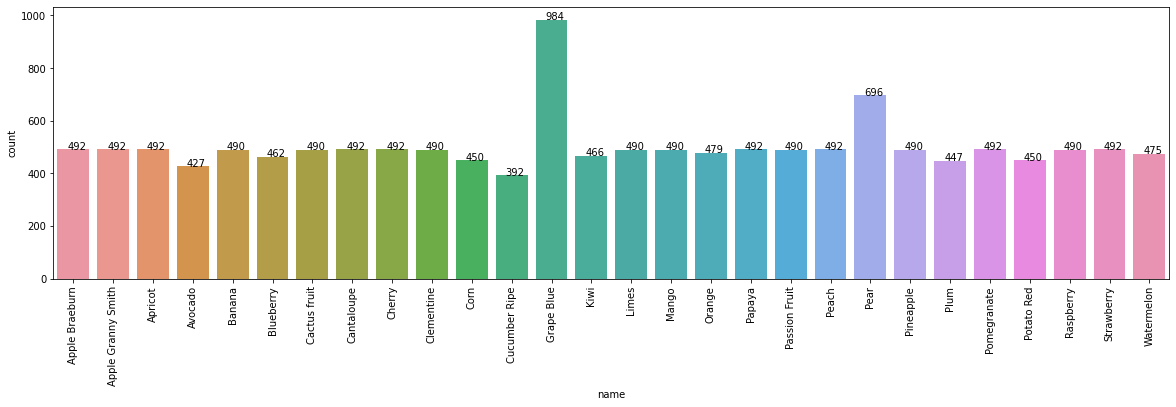

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
a=sns.countplot(x='name',data=df)
for p in a.patches:
    a.annotate('{}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.01))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14076 entries, 0 to 14075
Columns: 2501 entries, 0 to name
dtypes: object(1), uint8(2500)
memory usage: 33.7+ MB


In [ ]:
# View an image
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+"/"+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 100)

  # Read in the image and plot it using matplotlib
  img = plt.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  return img

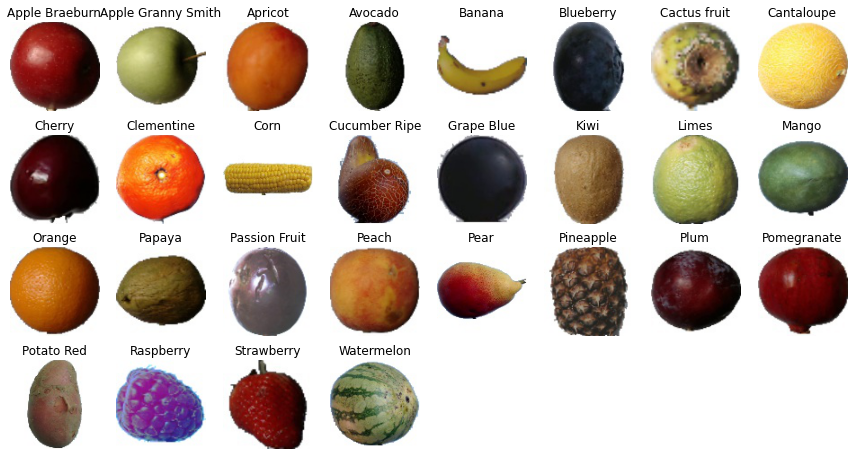

In [ ]:
plt.figure(figsize = (15,10))
# View a random image from the training dataset for all classes
for i in range(len(classes)):
    plt.subplot(5,8,i+1)
    img = view_random_image(target_dir=train_dir,
                        target_class=classes[i])

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df)

# Feature Extarction

In [ ]:
features = np.append(np.mean(X , axis=1) , np.std(X , axis=1) , axis=1)
print(features.shape)

(14076, 100)


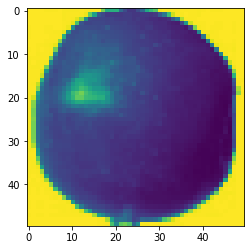

In [ ]:
plt.imshow(X[0])

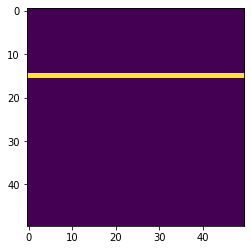

In [ ]:
temp = np.zeros([50 , 50] , dtype= int)
temp[15,:]  = np.mean(X[0])
plt.imshow(temp)

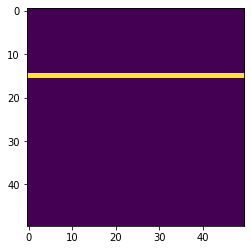

In [ ]:
temp = np.zeros([50 , 50] , dtype= int)
temp[15,:]  = np.std(X[0])
plt.imshow(temp)

In [ ]:
le = LabelEncoder().fit(y)
y = le.transform(y)
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
import joblib
joblib.dump(le,"Label_Encoder.pkl")
print("saved")

saved


In [ ]:
le.inverse_transform([y[0]])

array(['Apple Braeburn'], dtype='<U18')

# Fruit Detector

In [ ]:
#Train Test Split
raw_images = np.array(X1)
labels = np.array(y)
(X_train, X_test, y_train, y_test) = train_test_split(raw_images, labels, test_size=0.25, random_state=0)

In [ ]:
print("X_train:-",X_train.shape)
print("X_test:-",X_test.shape)
print("y_train:-",y_train.shape)
print("y_test:-",y_test.shape)

X_train:- (10557, 2500)
X_test:- (3519, 2500)
y_train:- (10557,)
y_test:- (3519,)


In [ ]:
#Model_Eval Fun

from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score
def model_Eval(y_test,y_pred):

    acc=accuracy_score(y_test,y_pred)
    print("Accuracy :-",acc)
    print("Error rate :-",1-acc)
    print("Precision:-",precision_score(y_test,y_pred,average='weighted'))
    print("Recall:- ",recall_score(y_test,y_pred,average='weighted'))
    print("F1 score :- ",f1_score(y_test,y_pred,average='weighted'))

    #Confusion matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(20,10))
    sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt=".1f")
    plt.xlabel('Predicted')
    plt.ylabel("Actual")

#KNeighborsClassifier

model completed
Model training completed
y_pred completed
Acc of k=3 :-   99.94316567206593
Accuracy :- 0.9994316567206593
Error rate :- 0.0005683432793407439
Precision:- 0.9994360260263865
Recall:-  0.9994316567206593
F1 score :-  0.9994314034751445


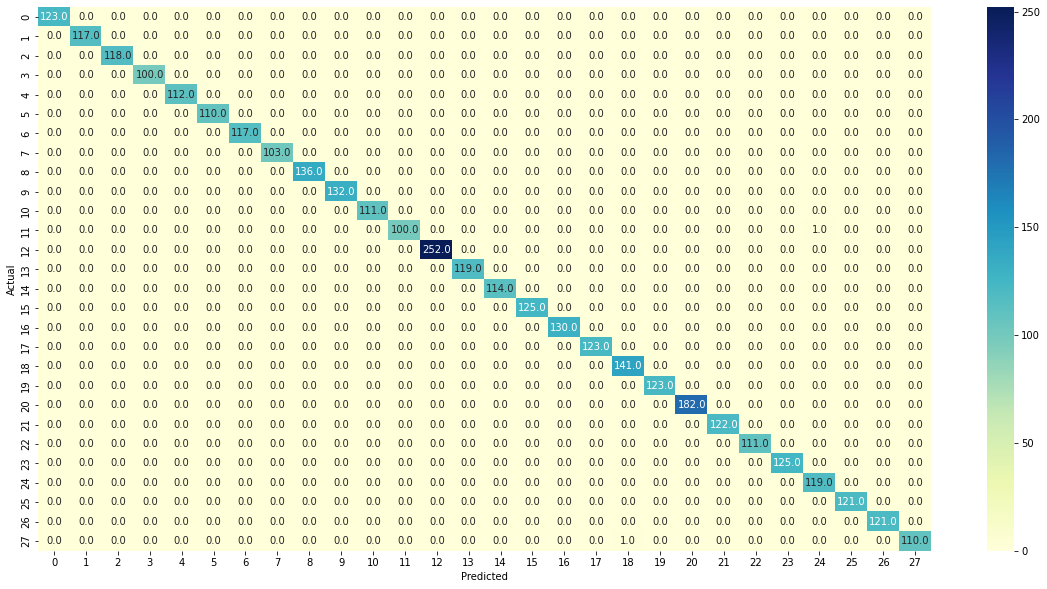

In [ ]:
ML_Model=KNeighborsClassifier(n_neighbors=3,p=1)
print("model completed")

# traning
ML_Model.fit(X_train,y_train)
print("Model training completed")

# find y_pred

y_pred=ML_Model.predict(X_test)
print("y_pred completed")

# find acc
acc=accuracy_score(y_test,y_pred)
print("Acc of k=3 :-  ",acc*100)

#KNN Eval
model_Eval(y_test,y_pred)

In [ ]:
import joblib
joblib.dump(ML_Model,"KNN_Model.pkl")
print("saved")

saved


#GaussianNB

model completed
traning completed
y_pred completed
Accuracy :- 0.907075873827792
Error rate :- 0.09292412617220802
Precision:- 0.9249805009269318
Recall:-  0.907075873827792
F1 score :-  0.9081935753979505


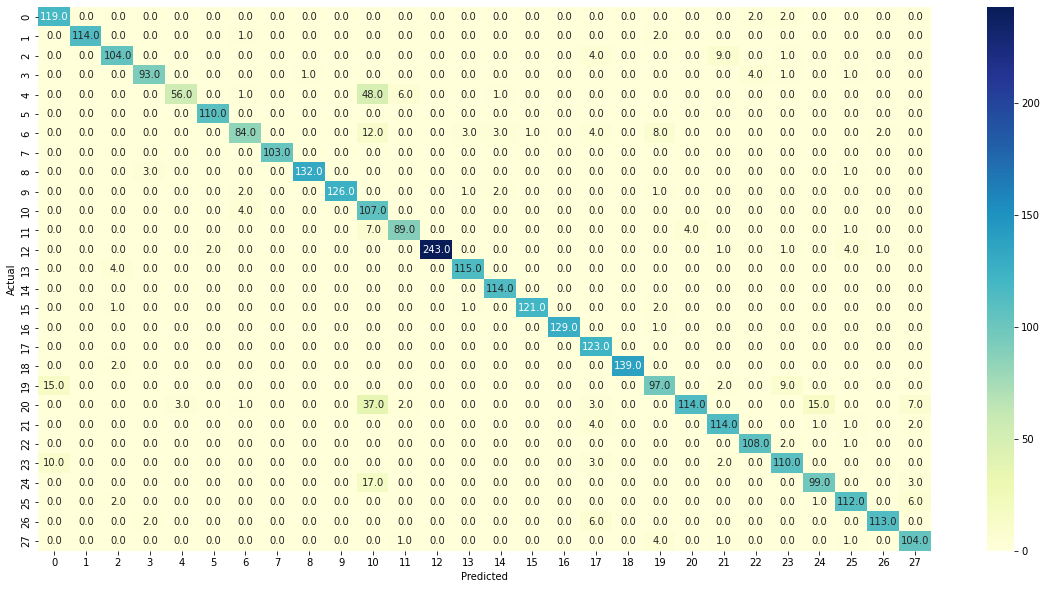

In [ ]:
# NB
from sklearn.naive_bayes import GaussianNB

ML_Model=GaussianNB()
print("model completed")

#traning
ML_Model.fit(X_train,y_train)
print("traning completed")

# y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred completed")

# Eval
model_Eval(y_test,y_pred)

In [ ]:
import joblib
joblib.dump(ML_Model,"NB_Model.pkl")
print("saved")

saved


#LogisticRegression

model completed


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Model traning completed
y_pred completed
Accuracy :- 0.9991474850809889
Error rate :- 0.0008525149190110604
Precision:- 0.9991520321182339
Recall:-  0.9991474850809889
F1 score :-  0.999147403541803


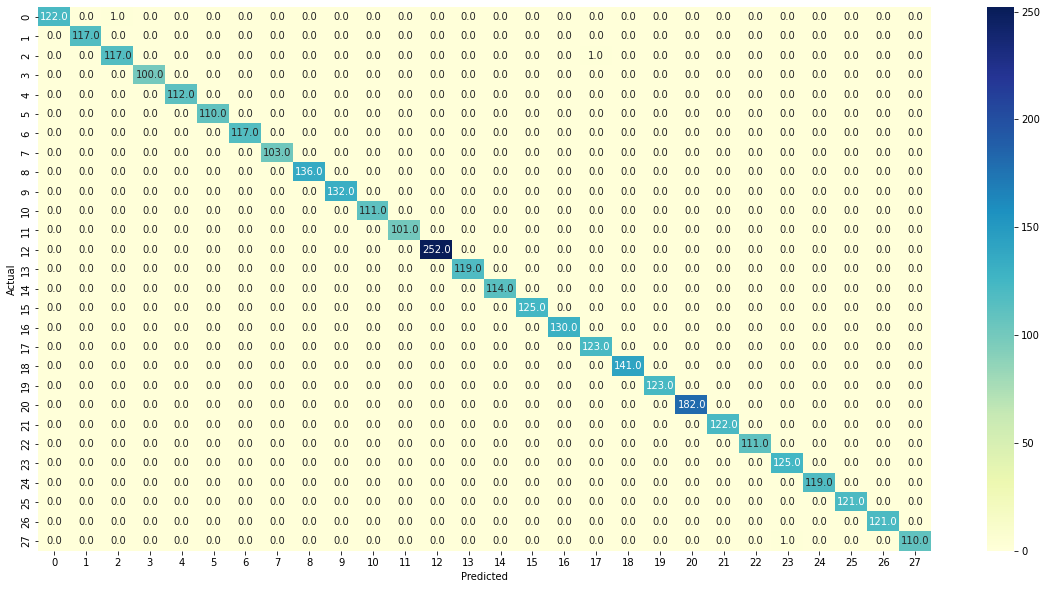

In [ ]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

ML_Model=LogisticRegression()
print("model completed")

# model traning
ML_Model.fit(X_train,y_train)
print("Model traning completed")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred completed")

# LR Eval
model_Eval(y_test,y_pred)


In [ ]:
import joblib
joblib.dump(ML_Model,"LR_Model.pkl")
print("saved")

saved


#RandomForestClassifier

mpdel created
model trained
find y_pred
accuracy for RandomForestClassifier :-  92.15686274509804
Accuracy :- 0.9215686274509803
Error rate :- 0.07843137254901966
Precision:- 0.9343483186841339
Recall:-  0.9215686274509803
F1 score :-  0.9144327388189973


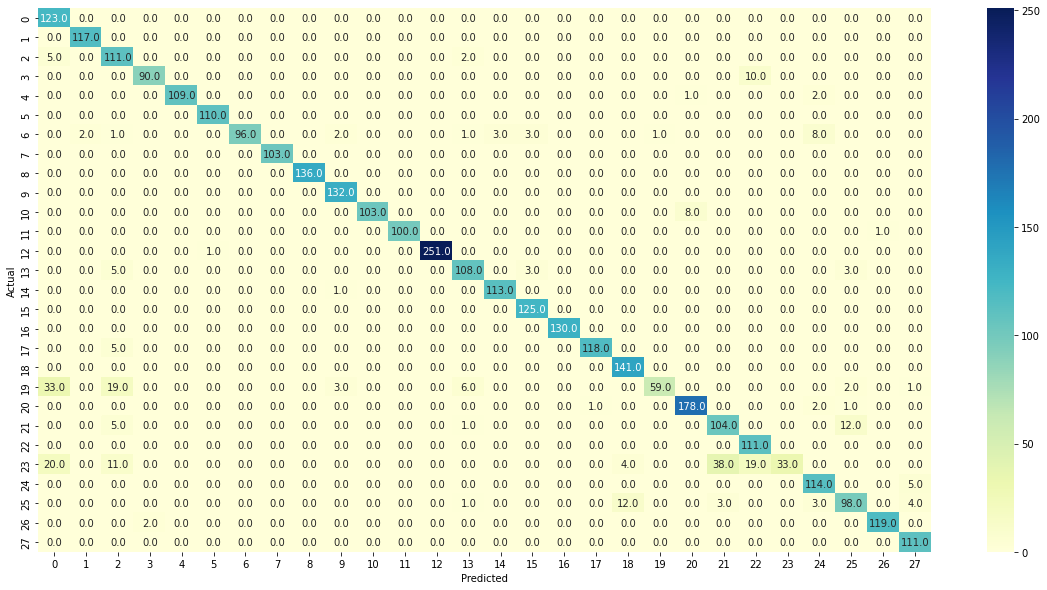

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# model creation
ML_Model=RandomForestClassifier(max_depth=8)
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for RandomForestClassifier :- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

In [ ]:
import joblib
joblib.dump(ML_Model,"RFC_Model.pkl")
print("saved")

saved


# AdaBoostClassifier


mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  18.073316283034956
Accuracy :- 0.18073316283034954
Error rate :- 0.8192668371696504
Precision:- 0.1532785024154048
Recall:-  0.18073316283034954
F1 score :-  0.14031871042729205


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


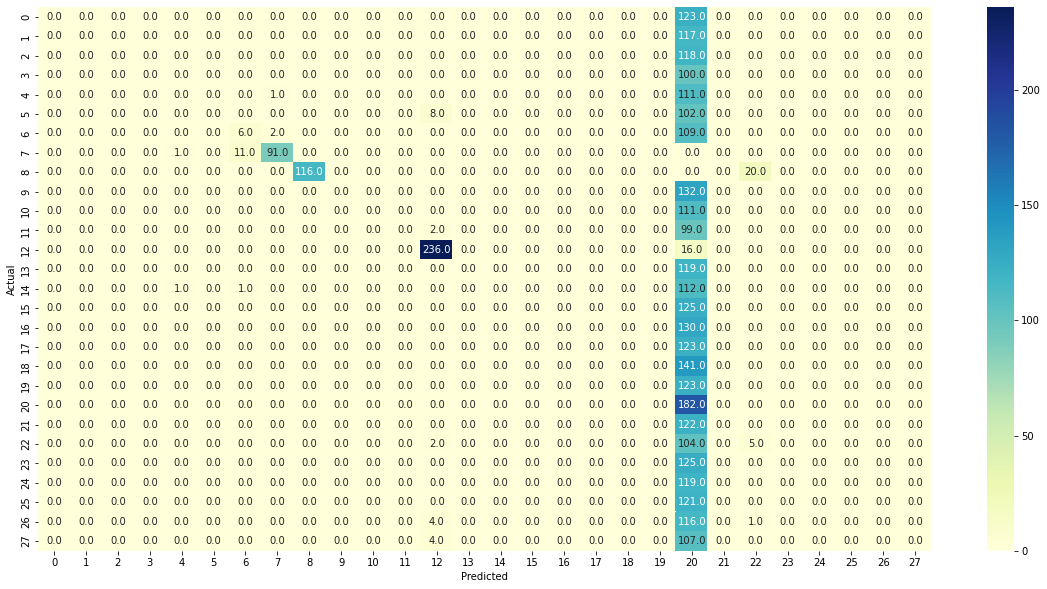

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# model creation
ML_Model=AdaBoostClassifier(n_estimators=200, random_state=0)
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

In [ ]:
import joblib
joblib.dump(ML_Model,"ADB_Model.pkl")
print("saved")

saved


#XGBoost

mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  99.88633134413185
Accuracy :- 0.9988633134413185
Error rate :- 0.0011366865586814878
Precision:- 0.99887043894826
Recall:-  0.9988633134413185
F1 score :-  0.9988632515911766


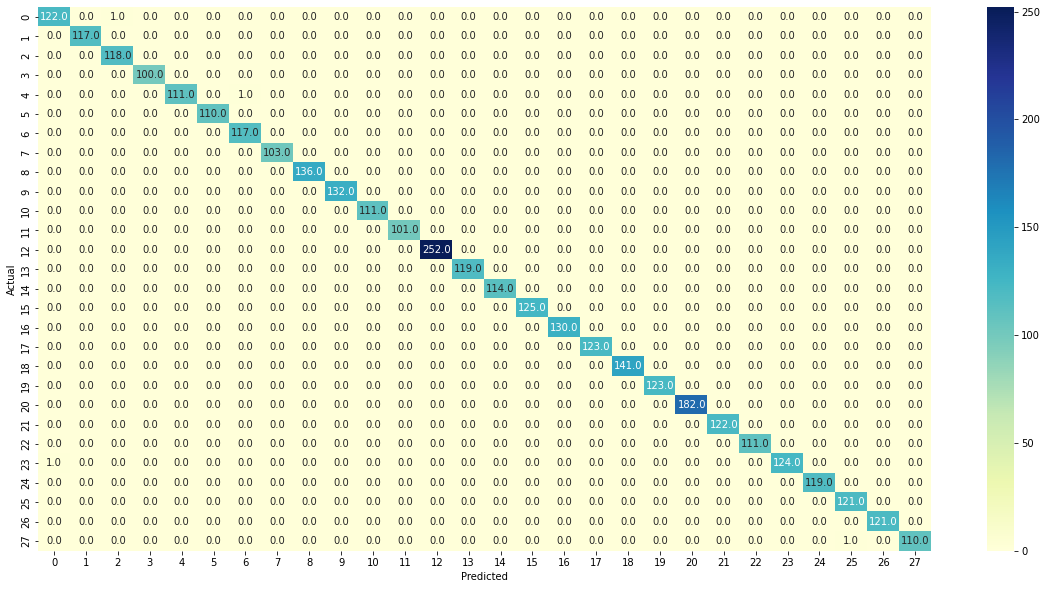

In [ ]:
#XGBoost
import xgboost as xgb

# model creation
ML_Model=xgb.XGBClassifier()
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

In [ ]:
import joblib
joblib.dump(ML_Model,"XGB_Model.pkl")
print("saved")

saved


# Prediction

In [ ]:
pred_dir='/content/drive/MyDrive/Colab Notebooks/Dataset/Fruit Classification/test/test/5639.jpg'

In [ ]:
X_pred=[]
X_pred.append(cv2.resize(cv2.cvtColor(cv2.imread(f'{pred_dir}'), cv2.COLOR_BGR2GRAY), (50, 50)))

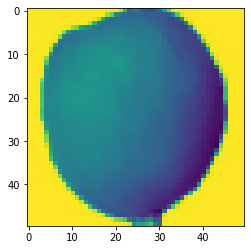

In [ ]:
plt.imshow(X_pred[0])

In [ ]:
X_pred = np.asarray(X_pred)
X_pred.shape

(1, 50, 50)

In [ ]:
X_pred = X_pred.reshape(X_pred.shape[0] , -1)
X_pred.shape

(1, 2500)

In [ ]:
pred=ML_Model.predict(X_pred)[0]

In [ ]:
pred

13

In [ ]:
le.inverse_transform([pred])

array(['Kiwi'], dtype='<U18')

In [ ]:
le.inverse_transform([pred])